<a href="https://colab.research.google.com/github/GwiYeonKim/modulabs_repository/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D_2_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 시계열 분석 미니 프로젝트 보고서 (시계열 기초 Day2 )

## 1. 프로젝트 계요
본 프로젝트는 시계열 데이터의 전처리 및 분류 모델링 절차를 실습하여, 시계열 분석의 기본 개념과 기법들을 이해하고 적용해보는 것을 목표로 하였다.
전처리 파트에서는 **정상성 확보를 위한 분석**을, 모델링 파트에서는 **시계열 분류 문제를 해결**하는 과정을 다루었다.

## 2. 데이터셋 개요
- **AirPassengers**: 1949년부터 1960년까지 월별 국제선 항공 승객 수 데이터를 포함하는 단변량 시계열 데이터
  → **정상성 전처리 실습용**으로 활용하였다.

- **Robot Execution Failures**: 로봇 팔 센서 데이터를 기반으로 고장 여부를 이진 분류하는 시계열 분류 데이터
  → **시계열 분류 모델링 실습용**으로 활용하였습니다.

## 3. 시계열 전처리 : 정상성 확보(AirPassengers)

정상성 있는 시계열 데이터를 만들기 위해 다음과 같은 순서를 수행하였다.

### 3-1. 데이터 불러오기
- csv 파일을 업로드 하여 불러옴

### 3-2. 시각적 탐색
- 시계열에 **상승 추세**와 **계절성**이 존재함을 확인함
- 시간이 지날수록 **분산이 증가**하는 경향을 관찰됨

### 3-3. 분산 안정화
- 로그 변환 (`log transformation`)을 통해 분산을 일정하게 만듦

### 3-4. 추세 제거
- 1차 차분을 통해 상승 추세를 제거

### 3-5. 계절성 제거
- 계절 차분 (12개월 주기)을 추가로 수행하여 계절성 제거

### 3-6. 정상성 검정
- ADF (Augmented Dickey-Fuller) 테스트를 사용하여 정상성 여부를 판단
  - 귀무가설: 단위근(unit root)이 존재한다 → 비정상 시계열
  - **p-value < 0.01** → 귀무가설 기각 → **정상 시계열로 판단**


## 4. 시계열 분류: 모델링 절차 (Robot Execution Failures)

시계열 분류 문제를 해결하기 위한 전체 흐름은 다음과 같다:

### 4-1. 데이터 다운로드 및 불러오기
- `tsfresh` 라이브러리를 활용하여 `robot_execution_failures` 데이터셋을 불러옴

### 4-2. 데이터 구조 확인
- `timeseries`: 개별 샘플에 대한 센서 측정값 (다변량 시계열)
- `y`: 각 시계열에 대한 고장 여부 (이진 레이블)

### 4-3. 데이터셋 나누기
- 학습/검증용 데이터 분리 (`train_test_split`)

### 4-4. Feature Extraction
- `tsfresh`의 `extract_features()`를 통해 시계열에서 특성 추출

### 4-5. 결측값 처리
- `impute()`를 사용해 추출된 feature의 결측값을 처리

### 4-6. 모델 학습 및 평가
- RandomForestClassifier 및 XGBoostClassifier 적용
- 각각의 `score` 비교 및 성능 확인

  4-6-1. RandomForest Score : 0.8571428571428571

  4-6-2. XGBoost Score : 1.0

  4-6-3. Logistics Regression : 0.5714285714285714

### 4-7. 중요 특성 시각화
- RandomForest의 feature_importances_를 활용하여 Feature 중요도 시각화
- XGBoost의 `plot_importance()`를 활용하여 feature 중요도 시각화

  4-7-1. RandomForest 중요 특성 : F_x_partial_autocorrelation_lag_1

  4-7-2. XGBoost 중요 특성 : F_X_abs_energy

  4-7-3. Logistics Regression 중요 특성 : T_X_abs_energy

### 4-8. 성능 평가
- Classification Report를 통해 precision, recall, F1-score 등 정량 평가
### ✅ Random Forest vs XGBoost Classification vs Logistics Regression Report

| Metric            | Class   | Random Forest | XGBoost | Logistic Regression |
|-------------------|---------|----------------|---------|----------------------|
| **Precision**     | true    | 1.00           | 1.00    | 1.00                 |
|                   | false   | 0.625          | 1.00    | 0.357                |
| **Recall**        | true    | 0.8125         | 1.00    | 0.4375               |
|                   | false   | 1.00           | 1.00    | 1.00                 |
| **F1-score**      | true    | 0.897          | 1.00    | 0.609                |
|                   | false   | 0.769          | 1.00    | 0.526                |
| **Accuracy**      | -       | 0.857          | 1.00    | 0.571                |
| **Macro Avg**     |         |                |         |                      |
| Precision         | -       | 0.8125         | 1.00    | 0.679                |
| Recall            | -       | 0.9063         | 1.00    | 0.719                |
| F1-score          | -       | 0.833          | 1.00    | 0.568                |
| **Weighted Avg**  |         |                |         |                      |
| Precision         | -       | 0.911          | 1.00    | 0.847                |
| Recall            | -       | 0.857          | 1.00    | 0.571                |
| F1-score          | -       | 0.866          | 1.00    | 0.589                |


### 4-9. 결과 요약
- XGBoost는 모든 지표에서 완벽한 성능을 보이며, 과적합 가능성도 고려해야 함.
- Random Forest는 true 클래스에 대해 높은 precision과 recall을 보였지만, false 클래스(정상)의 precision이 낮아 정상인데 실패로 잘못 분류된 경우가 있음.
- Logistic Regression은 전반적으로 recall 편향이 강하며 정확도도 낮은 편. 특히 true 클래스에 대한 recall이 많이 낮아 불균형한 예측이 나타났음.
- **정확도(accuracy)**는 XGBoost가 가장 높지만, 데이터 수가 적은 점(총 21개)도 감안해야 함.

## 5. 결론 및 소감

- AirPassengers 데이터를 통해 **정상성 확보를 위한 시계열 전처리 절차**를 실습하며 시계열 분석의 기본 개념을 익혔다.
- Robot Execution Failures 데이터를 활용하여 **시계열 분류 문제 해결 흐름**을 실습하며, feature extraction의 중요성과 시계열 기반 분류 모델의 성능 해석 방법을 이해할 수 있었다.





# 1. 시계열 전처리 : 정상성 확보(AirPassengers)

## 1-1. 데이터 불러오기

In [129]:
# tsfresh 라이브러리 설치

In [130]:
!pip install tsfresh

In [131]:
# 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작
# import os
# os.kill(os.getpid(), 9)

In [132]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# 업로드한 데이터 불러오기
ap = pd.read_csv('./sample_data/AirPassengers.csv')

## 1-2. 데이터 시각적 탐색

In [134]:
# 'Month' column 삭제
ap.drop('Month',axis=1, inplace=True)

In [135]:
# 데이터 형태 및 개수 확인
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


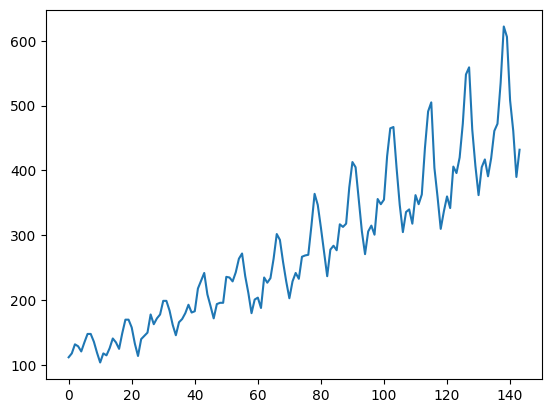

In [136]:
# 데이터 형태 그래프로 확인
plt.figure()
plt.plot(ap)
plt.show()

- 시계열 그래프에서 시간의 흐름에 따라 전체적으로 증가하는 **추세(trend)**가 확인되며, 이는 비정상 시계열의 전형적인 특징이다.
- 또한, 연도별로 유사한 패턴이 반복되어 나타나는 **계절성(seasonality)**도 관찰된다.
- 시간이 지날수록 데이터의 **분산이 점점 커지는 경향(heteroscedasticity)**이 나타나며, 이는 로그 변환 등의 분산 안정화 처리가 필요한 상황임을 시사함.


## 1-3. 분산 안정화

In [137]:
# np.log를 통해서 log transformation 수행.
log_transformed = np.log(ap)

In [138]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


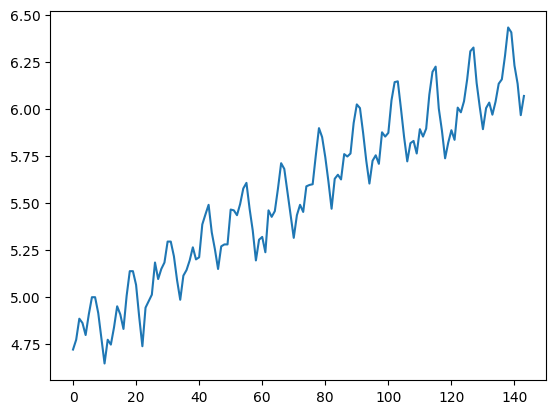

In [139]:
# 분산이 일정하지 않은 문제를 완화함.
plt.figure()
plt.plot(log_transformed)
plt.show()

## 1-4. 추세 제거

In [140]:
# 1차 차분(differencing)을 적용하여 추세(trend) 제거
diffed = log_transformed.diff()[1:] # 맨 앞 값은 무조건 NaN이기 때문에 이를 제거하기 위해 [1:] 사용

In [141]:
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


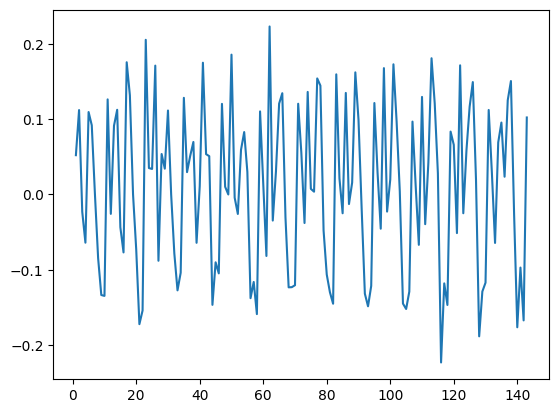

In [142]:
# diffed 데이터 확인 : 커지는 분산과 증가하는 추세가 제거됨.
plt.figure()
plt.plot(diffed)
plt.show()

## 1-5. 계절성 제거

In [143]:
# 계절 차분(seasonal differencing, 주기=12)을 통해 월별 반복되는 패턴 제거
seasonally_diffed = diffed.diff(12)
# 주기 12로 차분을 하면 앞의 12개 데이터는 NaN이 되므로. 빈칸 제거.
seasonally_diffed.dropna(inplace = True)

In [144]:
# seasonally_diffed : 143 - 12 = 131 rows 확인.
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


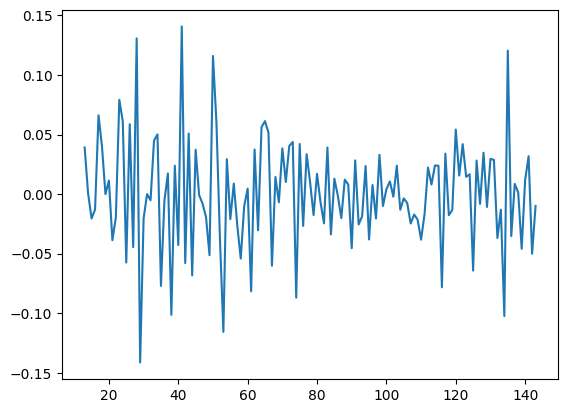

In [145]:
# seasonally_diffed 데이터 확인
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

## 1-6. 정상성 검정
- 정상성 여부를 확인하기 위해 ADF (Augmented Dickey-Fuller) 테스트를 사용함.
- ADF 검정의 귀무가설은 **"시계열에 단위근(unit root)이 존재한다"**, 즉 **비정상(non-stationary)** 시계열이라는 가정임.
- **p-value < 0.01**일 경우 귀무가설을 기각하고, 해당 시계열은 **정상(stationary)**이라고 판단함.





In [146]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다.
    print('ADF statistics : ', stat) # ADF 검정 통계량
    print('P-value : ', p_value ) # P-value

In [147]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행합니다.
adf_test(seasonally_diffed)

ADF statistics :  -4.4433249418311425
P-value :  0.00024859123113838495


p-value가 0.0002로 0.01보다 작으므로, **귀무가설을 기각**하고 해당 시계열은 **정상(stationary)라고 판단함.**

# 2. 시계열 분류: 모델링 절차 (Robot Execution Failures)

## 2-1. 데이터 다운로드 및 불러오기
- `tsfresh` 라이브러리를 활용하여 `robot_execution_failures` 데이터셋을 불러옴

In [167]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exection failures 데이터 불러오기
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

## 2-2. 데이터 구조 확인
- `timeseries`: 개별 샘플에 대한 센서 측정값 (다변량 시계열)
- `y`: 각 시계열에 대한 고장 여부 (이진 레이블)

In [168]:
# 데이터셋 확인(timeseries와 y 확인)
timeseries # 개별 샘플에 대한 센서 측정값 (다변량 시계열)

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [150]:
y # 각 시계열에 대한 고장 여부 (이진 레이블)

,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


## 2-3. 데이터셋 나누기
- 학습/검증용 데이터 분리 (`custom_classification_split`)


In [151]:
# 데이터셋 나누기
def custom_classification_split(x,y,test_size=0.3):

    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()

    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()
    X_train = timeseries[~timeseries["id"].isin(id_list)]
    X_test = timeseries[timeseries["id"].isin(id_list)]

    return X_train, y_train, X_test, y_test

In [152]:
# Train / Test : 0.75 / 0.25
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

## 2-4. Feature Extraction
- `tsfresh`의 `extract_features()`를 통해 시계열에서 특성 추출

In [153]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [154]:
# Feature extraction
comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 402/402 [00:54<00:00,  7.40it/s]


In [155]:
comprehensive_features_test = extract_features(
                                    X_test,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:11<00:00, 10.81it/s]


## 2-5. 결측값 처리
- `impute()`를 사용해 추출된 feature의 결측값을 처리

In [169]:
# 원본 데이터를 복사하여 impute
comprehensive_features_train_imputed = comprehensive_features_train.copy()
impute(comprehensive_features_train_imputed)

# 두 개의 모델에서 각각 사용하기 위한 복사본 생성
X_train_rf = comprehensive_features_train_imputed.copy()
X_train_xgb = comprehensive_features_train_imputed.copy()
X_train_lr = comprehensive_features_train_imputed.copy()

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [170]:
# 원본 데이터를 복사하여 impute
comprehensive_features_test_imputed = comprehensive_features_test.copy()
impute(comprehensive_features_test_imputed)

# 두 개의 모델에서 각각 사용하기 위한 복사본 생성
X_test_rf = comprehensive_features_test_imputed.copy()
X_test_xgb = comprehensive_features_test_imputed.copy()
X_test_lr = comprehensive_features_test_imputed.copy()

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


## 2-6. 모델 학습 및 평가
- RandomForestClassifier 및 XGBoostClassifier 적용
- 각각의 `score` 비교 및 성능 확인

### 2-6-1. RandomForest

In [158]:
# RandomForest 학습
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(X_train_rf, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [159]:
# Score 확인
rf_clf.score(X_test_rf, y_test)

0.8571428571428571

### 2-6-2. XGBoost

In [160]:
# XGBoost 학습
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)
xgb_clf.fit(X_train_xgb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
# XGBoost 모델의 score를 확인합니다.
xgb_clf.score(X_test_xgb, y_test)

1.0

### 2-6-3. Logistics Regression

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#  Logistics Regression 모델 생성
logreg = LogisticRegression(max_iter=1000, random_state=42)

#  Logistics Regression 모델 학습
logreg.fit(X_train_lr, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [173]:
# Logistics Regression 모델의 score를 확인합니다.
logreg.score(X_test_lr, y_test)

0.5714285714285714

## 2-7. 중요 특성 시각화
- RandomForest의 `feature_importances_`를 활용하여 Feature 중요도 시각화
- XGBoost의 `plot_importance()`를 활용하여 feature 중요도 시각화

### 2-7-1.RandomForest

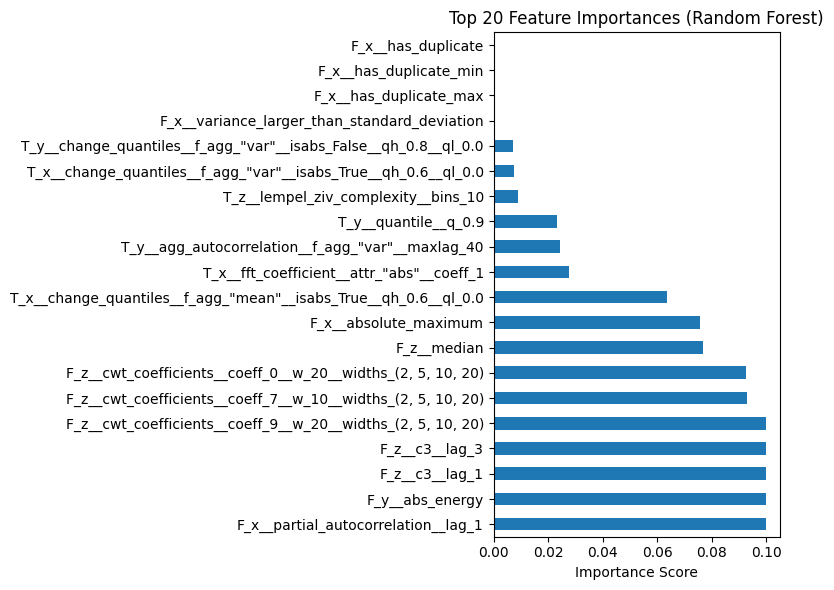

In [162]:
# feature importance 가져오기
importances = rf_clf.feature_importances_
feature_names = X_train_rf.columns if hasattr(X_train_rf, 'columns') else [f'feature_{i}' for i in range(X_train_rf.shape[1])]

# 시각화
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.nlargest(20).plot(kind='barh', figsize=(8, 6))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

-  Random Forest 분류기로 학습한 뒤 산출한 상위 20개 특성(feature)의 중요도를 시각화한 것
- 가장 높은 중요도를 가진 Feature : F_x_partial_autocorrelation_lag_1

### 2-7-2. XGBoost

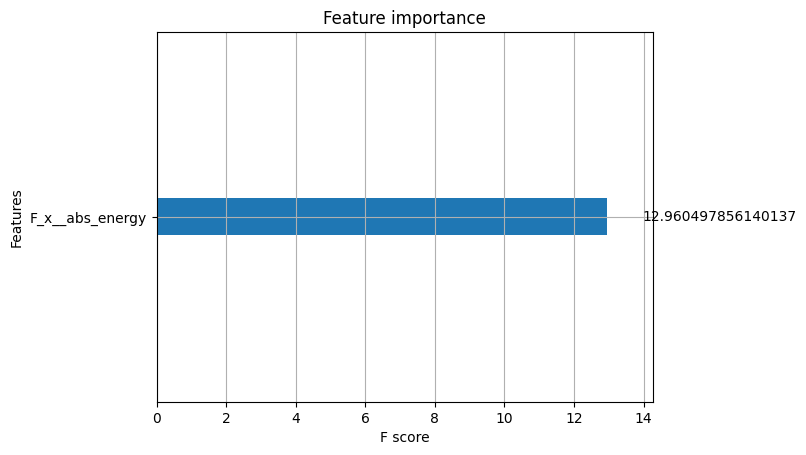

In [163]:
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [164]:
sum(xgb_clf.feature_importances_ != 0) # Fx 값의 abs_energy 특징만의 유의미함

np.int64(1)

- 고장 유무를 판별하는 기준은 F_X_abs_energy라는 특징 하나임!

### 2-7-3. Logistics Regression

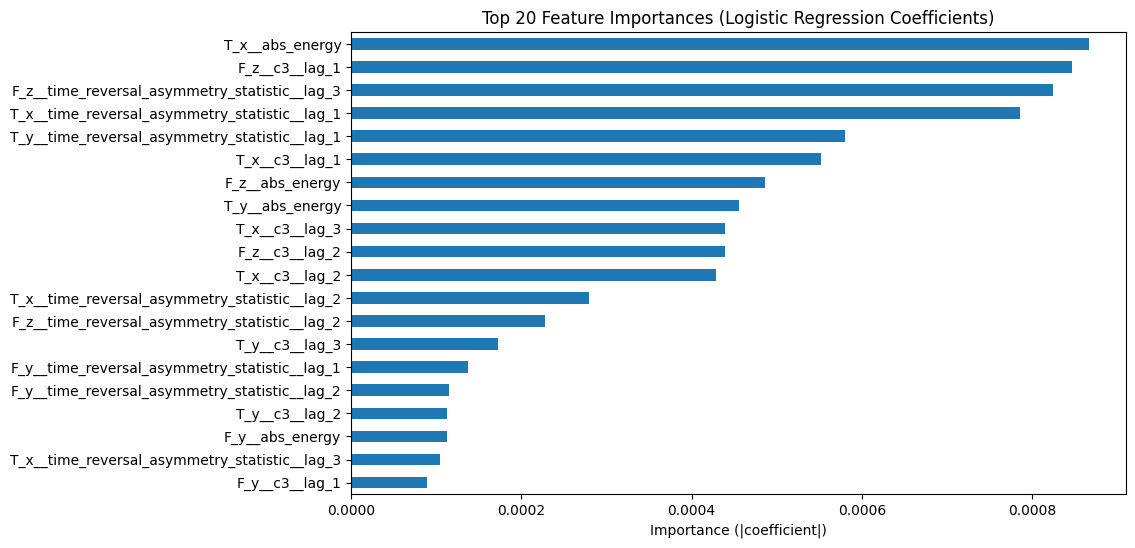

In [174]:
# 특성 중요도 추출 (계수)
coefficients = logreg.coef_[0]  # 이진 분류이므로 첫 번째 계수 배열만 사용

# 특성 이름과 함께 정리 (X_train_lr은 특성 이름이 있는 DataFrame)
feature_importance = pd.Series(coefficients, index=X_train_lr.columns)

# 중요도 절댓값 기준 정렬
feature_importance = feature_importance.abs().sort_values(ascending=False)

# 상위 20개 시각화
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Logistic Regression Coefficients)")
plt.gca().invert_yaxis()
plt.xlabel("Importance (|coefficient|)")
plt.show()

-  logistics Regression 분류기로 학습한 뒤 산출한 상위 20개 특성(feature)의 중요도를 시각화한 것
- 가장 높은 중요도를 가진 Feature : T_x__abs_energy

## 2-8. 성능 평가
- Classification Report를 통해 precision, recall, F1-score 등 정량 평가

### 2-8-1. RandomForest

In [165]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, rf_clf.predict(X_test_rf), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.8125,
  'f1-score': 0.896551724137931,
  'support': 16.0},
 'false': {'precision': 0.625,
  'recall': 1.0,
  'f1-score': 0.7692307692307693,
  'support': 5.0},
 'accuracy': 0.8571428571428571,
 'macro avg': {'precision': 0.8125,
  'recall': 0.90625,
  'f1-score': 0.8328912466843501,
  'support': 21.0},
 'weighted avg': {'precision': 0.9107142857142857,
  'recall': 0.8571428571428571,
  'f1-score': 0.8662372110647973,
  'support': 21.0}}

### 2-8-2. XGBoost

In [166]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(X_test_xgb), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0}}

### 2-8-3. Logistics Regression

In [175]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, logreg.predict(X_test_lr), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.4375,
  'f1-score': 0.6086956521739131,
  'support': 16.0},
 'false': {'precision': 0.35714285714285715,
  'recall': 1.0,
  'f1-score': 0.5263157894736842,
  'support': 5.0},
 'accuracy': 0.5714285714285714,
 'macro avg': {'precision': 0.6785714285714286,
  'recall': 0.71875,
  'f1-score': 0.5675057208237986,
  'support': 21.0},
 'weighted avg': {'precision': 0.846938775510204,
  'recall': 0.5714285714285714,
  'f1-score': 0.5890813991500491,
  'support': 21.0}}